In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## loading the dataset

In [75]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [76]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

In [77]:
data_df = pd.DataFrame(data, columns=column_names)
target_df = pd.Series(target, name='MEDV')

In [78]:
final_df = pd.concat([data_df, target_df], axis=1)

In [79]:
final_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Prepare the Dataset

In [80]:
final_df = final_df.rename(columns={'MEDV':'Price'})

In [81]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [82]:
##Summarizing the stats of the data

final_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Check Missing Values

In [83]:
final_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [84]:
### Exploratory Data Analysis
final_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [85]:
import seaborn as sns

In [86]:
#sns.pairplot(final_df)

Text(0.5, 0, 'Crime')

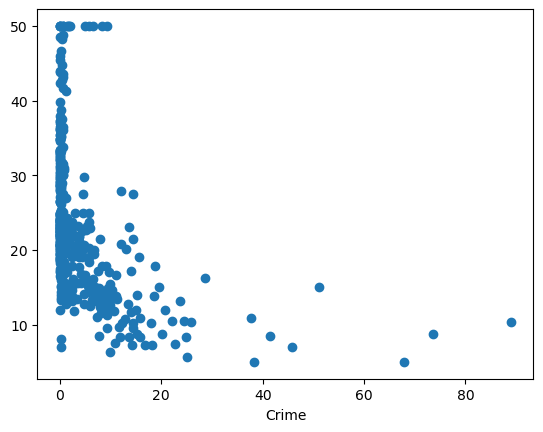

In [87]:
plt.scatter(final_df['CRIM'], final_df['Price'])
plt.xlabel('Crime')

<Axes: xlabel='RM', ylabel='Price'>

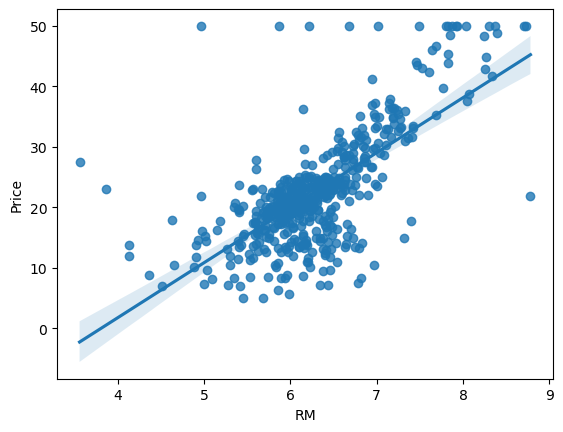

In [88]:
sns.regplot(x='RM',y='Price',data=final_df)

In [89]:
## Independent and Dependent Features

x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [90]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [91]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [92]:
## Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.3,random_state=42)

In [93]:
##Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [94]:
x_train = scaler.fit_transform(x_train)

In [95]:
x_train

array([[-0.49979751, -0.51775829, -1.30992749, ...,  0.12659232,
         0.4421702 , -1.03234561],
       [-0.50948631,  3.67303095, -1.07281994, ..., -1.12982162,
         0.3240353 , -1.37373488],
       [ 0.97672665, -0.51775829,  1.09437335, ...,  0.79967122,
         0.20690722,  0.72227225],
       ...,
       [-0.5095531 ,  3.2073877 , -1.33560156, ..., -0.63623043,
         0.37549558, -0.9308515 ],
       [ 1.50247247, -0.51775829,  1.09437335, ...,  0.79967122,
        -2.76906318,  1.72644881],
       [-0.4709658 , -0.51775829, -0.34639487, ...,  1.11377471,
        -3.20591621, -0.21731716]])

In [96]:
x_test = scaler.transform(x_test)

In [98]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
x_test

# Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(x_train,y_train)

In [ ]:
##print coefficients and intercept
print(regression.coef_)

In [ ]:
print(regression.intercept_)

In [ ]:
#On which the model will be trained
regression.get_params()

In [ ]:
##Predict the test data
reg_pred = regression.predict(x_test)

In [ ]:
reg_pred

In [ ]:
## plot a scatter plot 
plt.scatter(reg_pred,y_test)

In [ ]:
residuals = y_test - reg_pred

In [ ]:
residuals

In [ ]:
## plot this redisuals

sns.displot(residuals,kind= 'kde')

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

## R square and Adjusted R square

Formula
### R^2 = 1- SSR/SST

R^2 = coefficient of determination 
SSR = sum of squres of residuals 
SST = total sum of squares


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

### Adjusted R2 = 1 - [(1 - R2) * (n - 1)/(n - k - 1)]
R2 = the R2 of the model
n  = the no of observations
k = the no of predictor variables

In [ ]:
1 - (1-score)*(len(y_test)-1)/(len(y_test) -x_test.shape[1]-1)

## New Data Prediction

In [ ]:
data[0].reshape(1,-1)

In [ ]:
 #transformation of new data
scaler.transform(data[0].reshape(1,-1))

In [ ]:
regression.predict(scaler.transform(data[0].reshape(1,-1)))

### Pickling the Model file For Deployment 

In [ ]:
import pickle

In [ ]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [ ]:
## predicction

pickled_model.predict(scaler.transform(data[0].reshape(1,-1)))